# Logistic Regression

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('data/B.csv')
x_train, x_test, y_train, y_test = train_test_split(df[['petal length (cm)']], df['target'], random_state=3)
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<b>Step 1:</b> Make an instance of the Model

In [3]:
reg = LogisticRegression()

<b>Step 2:</b> Training the model on the data, storing the information learned from the data

In [4]:
reg.fit(x_train, y_train)

LogisticRegression()

<b>Step 3:</b> Predict the labels of new data

In [5]:
x_test[0].reshape(1,-1)
print('prediction', reg.predict(x_test[0].reshape(1,-1))[0])
print('probability', reg.predict_proba(x_test[0].reshape(1,-1)))

prediction 1
probability [[0.03047434 0.96952566]]


In [6]:
example_df = pd.DataFrame()
example_df.loc[:, 'petal length (cm)'] = x_test.reshape(-1)
example_df.loc[:, 'target'] = y_test.values
example_df['logistic_preds'] = pd.DataFrame(reg.predict_proba(x_test))[1]

<b>Step 4:</b> Visualize the data

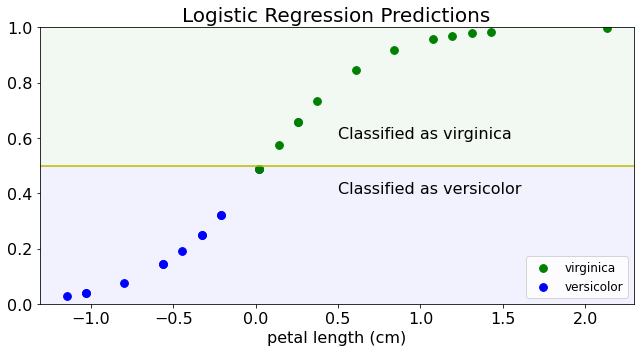

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (9,5));

virginicaFilter = example_df['target'] == 1
versicolorFilter = example_df['target'] == 0

ax.scatter(example_df.loc[virginicaFilter, 'petal length (cm)'].values,
           example_df.loc[virginicaFilter, 'logistic_preds'].values,
           color = 'g', s = 60, label = 'virginica')

ax.scatter(example_df.loc[versicolorFilter, 'petal length (cm)'].values,
           example_df.loc[versicolorFilter, 'logistic_preds'].values,
           color = 'b', s = 60, label = 'versicolor')

ax.axhline(y = .5, c = 'y')
ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as virginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 16)
ax.set_xlabel('petal length (cm)', fontsize = 16)
ax.set_title('Logistic Regression Predictions', fontsize = 20)
fig.tight_layout()
fig.savefig('images/2A', dpi = 300)

<b>Step 5:</b> Measure Accuracy of the Model

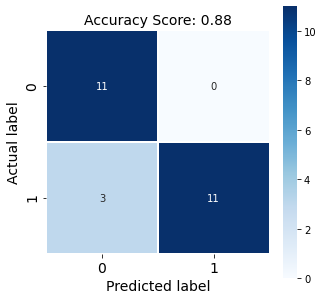

In [8]:
score = reg.score(x_test, y_test)
cm = metrics.confusion_matrix(y_test, reg.predict(x_test))

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues');
plt.ylabel('Actual label', fontsize = 14);
plt.xlabel('Predicted label', fontsize = 14);
plt.title('Accuracy Score: {:.2f}'.format(score), size = 14);
plt.tick_params(labelsize = 14)

### Example

In [9]:
df = pd.read_csv('data/C.csv')
pixel_colnames = df.columns[:-1]
image_values = df.loc[0, pixel_colnames].values

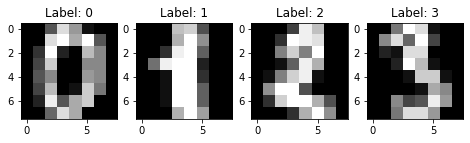

In [10]:
plt.figure(figsize=(10,2))
for index in range(0, 4):

    plt.subplot(1, 5, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(8,8), cmap ='gray')
    plt.title('Label: ' + str(image_label))

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df[pixel_colnames], df['label'], random_state=3)
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
reg = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=3)
reg.fit(x_train, y_train)
print('Training accuracy:', reg.score(x_train, y_train))
print('Test accuracy:', reg.score(x_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9888888888888889


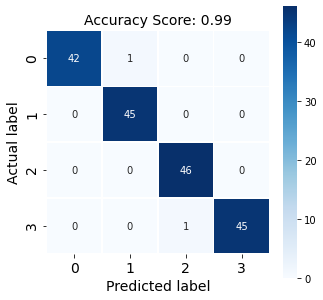

In [13]:
score = reg.score(x_test, y_test)
cm = metrics.confusion_matrix(y_test, reg.predict(x_test))

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues');
plt.ylabel('Actual label', fontsize = 14);
plt.xlabel('Predicted label', fontsize = 14);
plt.title('Accuracy Score: {:.2f}'.format(score), size = 14);
plt.tick_params(labelsize = 14)